In [1]:
import pandas as pd
from confidence import *

In [2]:
# Prepare dataset

data = pd.read_csv('~/Datasets/column_2C.dat.txt', sep = ' ', header=None)
data[6] = data[6].replace(['AB', 'NO'], [1, 0])  
data.head()

,0,1,2,3,4,5,6
0,63.03,22.55,39.61,40.48,98.67,-0.25,1
1,39.06,10.06,25.02,29.00,114.41,4.56,1
2,68.83,22.22,50.09,46.61,105.99,-3.53,1
3,69.30,24.65,44.31,44.64,101.87,11.21,1
4,49.71,9.65,28.32,40.06,108.17,7.92,1


In [3]:
data.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
dtype: int64

In [5]:
y = data[6]
X = data.drop(6, axis = 1)
y = np.ravel(y)
len(y)

310

In [7]:
print np.unique(y, return_counts=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0) 
rbtsc = RobustScaler()
X_train = rbtsc.fit_transform(X_train)   # fit + transform
X_test = rbtsc.transform(X_test) 

(array([0, 1]), array([100, 210]))


### All Results in One Graph

Accuracy at threshold 0.0 is 0.661290322581
Accuracy at threshold 0.01 is 0.661290322581
Accuracy at threshold 0.02 is 0.661290322581
Accuracy at threshold 0.03 is 0.661290322581
Accuracy at threshold 0.04 is 0.661290322581
Accuracy at threshold 0.05 is 0.661290322581
Accuracy at threshold 0.06 is 0.661290322581
Accuracy at threshold 0.07 is 0.661290322581
Accuracy at threshold 0.08 is 0.66935483871
Accuracy at threshold 0.09 is 0.66935483871
Accuracy at threshold 0.1 is 0.66935483871
Accuracy at threshold 0.11 is 0.66935483871
Accuracy at threshold 0.12 is 0.66935483871
Accuracy at threshold 0.13 is 0.677419354839
Accuracy at threshold 0.14 is 0.677419354839
Accuracy at threshold 0.15 is 0.677419354839
Accuracy at threshold 0.16 is 0.685483870968
Accuracy at threshold 0.17 is 0.685483870968
Accuracy at threshold 0.18 is 0.693548387097
Accuracy at threshold 0.19 is 0.693548387097
Accuracy at threshold 0.2 is 0.693548387097
Accuracy at threshold 0.21 is 0.701612903226
Accuracy at thresh

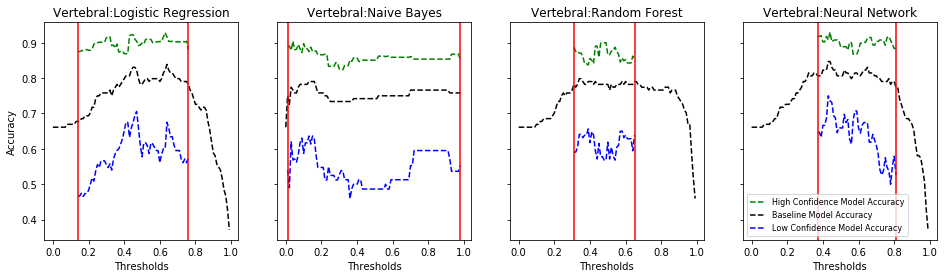

In [13]:
model = perform_logistic_regression(X_train, y_train)
full_threshold, conf_threshold, accuracy_model, accuracy_high_conf, accuracy_low_conf = get_all_accuracy_set_with_thresholds(model, X_train, y_train, X_test, y_test)

f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize=(16,4))


ax1.plot(conf_threshold,accuracy_high_conf, 'g--', label = "High Confidence Model Accuracy")
ax1.plot(full_threshold,accuracy_model, 'k--', label = "Baseline Model Accuracy")
ax1.plot(conf_threshold,accuracy_low_conf, 'b--', label = "Low Confidence Model Accuracy")
ax1.axvline(conf_threshold[0], color='r')
ax1.axvline(conf_threshold[-1], color='r')
ax1.set_xlabel('Thresholds')
ax1.set_ylabel('Accuracy')
ax1.set_title('Vertebral:Logistic Regression')


model = perform_gaussian_nb(X_train, y_train)
full_threshold, conf_threshold, accuracy_model, accuracy_high_conf, accuracy_low_conf = get_all_accuracy_set_with_thresholds(model, X_train, y_train, X_test, y_test)
ax2.plot(conf_threshold,accuracy_high_conf, 'g--', label = "High Confidence Model Accuracy")
ax2.plot(full_threshold,accuracy_model, 'k--', label = "Baseline Model Accuracy")
ax2.plot(conf_threshold,accuracy_low_conf, 'b--', label = "Low Confidence Model Accuracy")
ax2.axvline(conf_threshold[0], color='r')
ax2.axvline(conf_threshold[-1], color='r')
ax2.set_xlabel('Thresholds')
ax2.set_title('Vertebral:Naive Bayes')



model = perform_random_forest(X_train, y_train)
full_threshold, conf_threshold, accuracy_model, accuracy_high_conf, accuracy_low_conf = get_all_accuracy_set_with_thresholds(model, X_train, y_train, X_test, y_test)
ax3.plot(conf_threshold,accuracy_high_conf, 'g--', label = "High Confidence Model Accuracy")
ax3.plot(full_threshold,accuracy_model, 'k--', label = "Baseline Model Accuracy")
ax3.plot(conf_threshold,accuracy_low_conf, 'b--', label = "Low Confidence Model Accuracy")
ax3.axvline(conf_threshold[0], color='r')
ax3.axvline(conf_threshold[-1], color='r')
ax3.set_xlabel('Thresholds')
ax3.set_title('Vertebral:Random Forest')



model = perform_neural_network(X_train, y_train)
full_threshold, conf_threshold, accuracy_model, accuracy_high_conf, accuracy_low_conf = get_all_accuracy_set_with_thresholds(model, X_train, y_train, X_test, y_test)
ax4.plot(conf_threshold,accuracy_high_conf, 'g--', label = "High Confidence Model Accuracy")
ax4.plot(full_threshold,accuracy_model, 'k--', label = "Baseline Model Accuracy")
ax4.plot(conf_threshold,accuracy_low_conf, 'b--', label = "Low Confidence Model Accuracy")
ax4.axvline(conf_threshold[0], color='r')
ax4.axvline(conf_threshold[-1], color='r')
ax4.set_xlabel('Thresholds')
ax4.set_title('Vertebral:Neural Network')

ax4.legend(loc='best', prop={'size': 8})
plt.show()   
